# Linear Filters

author: Thomas Haslwanter \
date: April-2020

In [1]:
# Standard packages
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os

# Special imports
from scipy.io.wavfile import read
from IPython.display import Audio, display
from scipy import signal

In [2]:
#curDir = r'C:\Users\p20529\Coding\Python\th\CSS\ipynb'
audioDir = r'data\sounds'
#os.chdir(curDir)

There are two groups of linear filters:

* *Finite Impulse Response (FIR)*-filters
* *Infinite Impulse Response (IIR)*-filters

## Sample data

We will use the following data to demonstrate the effect of linear filters on these input data:

### Noisy Sine

In [8]:
# Generate a noisy sine-wave
rate = 10 # [Hz]
dt = 1/rate
t = np.arange(0, 20, dt)
(amp, noise_amp) = (5, 1)
x = amp * np.sin(t) + noise_amp *np.random.randn(len(t))

rate = 500
t = np.arange(0,1,1/rate)
freqs = [3, 50]
amps = [2, 0.5]
x = np.zeros(t.shape)
for freq, amp in zip(freqs,amps):
    x += amp * np.sin(2*np.pi*freq*t)
    
plt.plot(t,x)
plt.xlabel('Time')
plt.ylabel('Signal')

### Impulse and Step

Text(0.5, 1.0, 'Step')

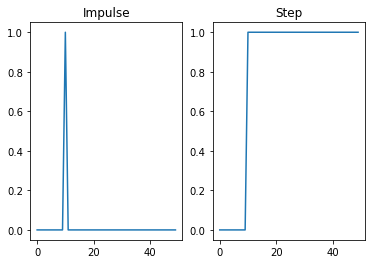

In [9]:
# Definition of *Impulse*
impulse = np.zeros(50)
impulse[10] = 1

# Definition of *Step*
step = np.zeros(50)
step[10:] = 1

# Show impulse and step
fig, axs = plt.subplots(1,2)
axs[0].plot(impulse)
axs[0].set_title('Impulse')

axs[1].plot(step)
axs[1].set_title('Step')

## Finite Impulse Response-Filters (FIR)

FIR-filters are essentially weighted moving-average filters:

<img src='data/images/MovingFilter.jpg' width=500>

Note the following aspects of FIR-filters:

* the input *feeds forward* to the output (i.e. there is no feedback)
* compared to the input, the output is delayed
* an *impulse* in the input (i.e. an input where $x_i=1$, and all other x's are 0) has only a finite effect on the output.

FIR-filters are amazingly versatile, and can be used to smooth and differentiate data. For example, if you have not yet come in contact with *Savitzky-Golay*-filters, check them out: it is may favorite filter, and can be used to simultaneously smooth the data, and calculate an arbitrary derivative.

### Averaging Filter ("Running Mean")

In [12]:
win_length = 11

# Filter coefficients
a = 1              # for FIR-filters, "a" is always "1"
b = np.ones(win_length)/win_length    # the weight-coefficients

y = signal.lfilter(b,a,x) # apply the filter to the input

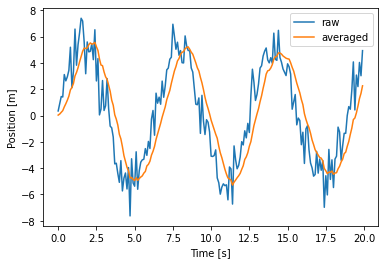

In [13]:
# Show the raw-data and the averaged signal
plt.plot(t, x, label='raw')
plt.plot(t, averaged, label='averaged')
plt.xlabel('Time [s]')
plt.ylabel('Position [m]')    # We interpret the data here as "position"-data
plt.legend()

## Impulse Response

**Important:** The impulse response of an FIR-filter is equal to the filter coefficients!

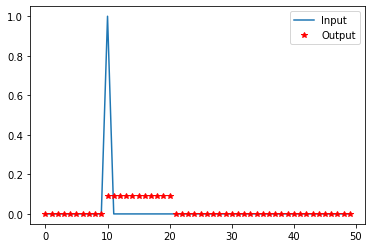

In [15]:
impFiltered = signal.lfilter(b,a, impulse)

plt.plot(impulse)
plt.plot(impFiltered, 'r*')
plt.legend(['Input', 'Output'])

While an averaging filter does reduce the noise, it also induces a time-delay in the filtered signal.

### Differentiation

In [16]:
b_2pnt_diff = np.r_[1, -1]/dt
diff_2pnt = signal.lfilter(b_2pnt_diff, a, x)

Text(0, 0.5, 'Velocity [m/s]')

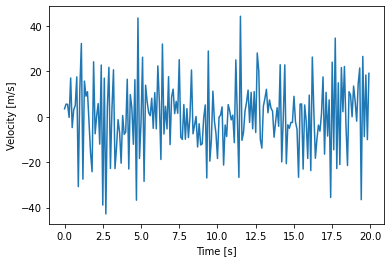

In [17]:
plt.plot(t, diff_2pnt)
plt.xlabel('Time [s]')
plt.ylabel('Velocity [m/s]')

Well, not so useful :(

Here a *Savitzky-Golay* filter comes in handy, which allows us to smooth and differentiate the data in one go

### Savitzky-Golay Filter

In [18]:
diff_savgol = signal.savgol_filter(x, window_length=21, polyorder=3, deriv=1, delta=dt)

Text(0, 0.5, 'Velocity [m/s]')

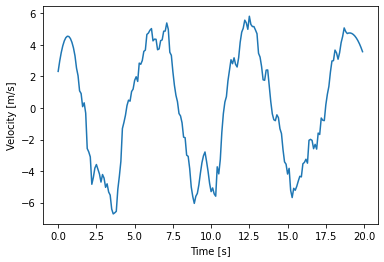

In [19]:
plt.plot(t, diff_savgol)
plt.xlabel('Time [s]')
plt.ylabel('Velocity [m/s]')

That's a lot better! What you have to watch out for: at the beginning and at the end of every linear filter, one has to allow for transient artefacts!

Another advantage of Savitzky-Golay filters: they are much better at reproducing maxima and minima:

Text(0.5, 1.0, 'zoomed in')

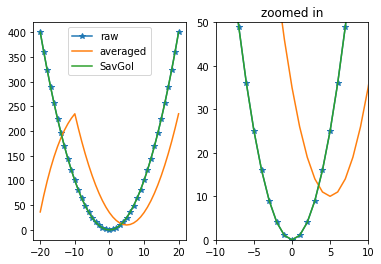

In [21]:
t = np.arange(-20, 21)
x = t**2

averaged = signal.lfilter(b, 1, x)
sg_filtered = signal.savgol_filter(x, window_length=win_length, polyorder=3, deriv=0)

fig, axs = plt.subplots(1,2)
axs[0].plot(t,x, '-*', label='raw')
axs[0].plot(t, averaged, label='averaged')
axs[0].plot(t, sg_filtered, label='SavGol')
axs[0].legend()

axs[1].plot(t,x, '-*', label='raw')
axs[1].plot(t, averaged, label='averaged')
axs[1].plot(t, sg_filtered, label='SavGol')
axs[1].set_xlim([-10, 10])
axs[1].set_ylim([0, 50])
axs[1].set_title('zoomed in')
